# An Example of how to use Fitting package to fit data

In [2]:
import DistFit.distfit as dft
import DistFit.datagen as dgn
import DistFit.gof as gof

# Examples Using Fitting Class

### 1) Bernoulli(0.3)

In [2]:
# generate data
# binomial with n=1 is Bernoulli
data_dist = dgn.Datagen(dist_type='binomial', row_count=1000, par=(1, 0.3), seed=1) 
data = data_dist.data_generation()

In [3]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='bernoulli')
fitted_mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_mle_param)

The fitted MLE parameter is 0.2970.


In [4]:
# check data to find potential distributions (useful for unknown data)
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Bernoulli']


['Bernoulli']

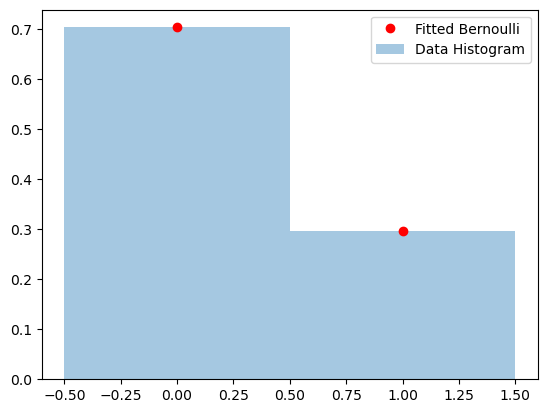

In [5]:
# plot data histogram vs. fited distribution
model.bernoulli_plot(fitted_mle_param)

In [6]:
# perform Goodness of Fit test
# This should raise error
gof_test = gof.Gof(dist_type='bernoulli', par=(fitted_mle_param))
gof_test.gof(data)

ValueError: GoF is not valid for Bernoulli.

### 2) Binomial(10, 0.7)

In [7]:
# generate data
# binomial with n=1 is Bernoulli
data_dist = dgn.Datagen(dist_type='binomial', row_count=1000, par=(10, 0.7), seed=1) 
data = data_dist.data_generation()

In [8]:
model = dft.Fitting(data, dist_type='binomial', n=10)
(n,p) = model.fit()
print("The fitted MLE parameters are %(n)d %(p).4f." %{'n':n, 'p':p})


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.


The fitted MLE parameters are 10 0.7023.


In [9]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 10


['Binomial', 'Geometric', 'Poisson']

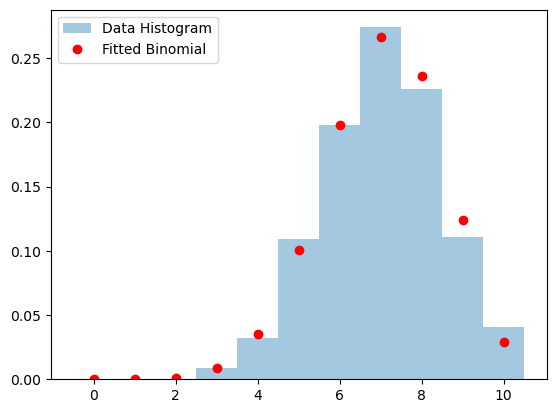

In [10]:
model.binomial_plot((n,p))

In [11]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='binomial', par=(n,p))
gof_test.gof(data)

Test Statistics: 3.4035889683759195 ; Critical Value: 7.814727903251178
Accept H0 that the distribution is a good fit at the given significance level.


True

In [9]:
# perform Goodness of Fit test for geometric
# first fit data to geometric
model = dft.Fitting(data, dist_type='geometric') 

gof_test = gof.Gof(dist_type='geometric', par=model.fit())
gof_test.gof(data)

0.1246416552411816
Test Statistics: 2152.167170878046 ; Critical Value: 7.814727903251178
Reject H0, the distribution is NOT a good fit at this significance level.


False

In [10]:
# perform Goodness of Fit test for poisson
# first fit data to Poisson
model = dft.Fitting(data, dist_type='poisson') 

gof_test = gof.Gof(dist_type='poisson', par=model.fit())
gof_test.gof(data)

7.023
Test Statistics: 363.88638837197226 ; Critical Value: 7.814727903251178
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 3) Geometric(0.42)

It seems MLE for geometric distribution is a rough estimate

In [3]:
# generate data
data_dist = dgn.Datagen(dist_type='geometric', row_count=1000, par=(.42), seed=1) 
data = data_dist.data_generation()

In [4]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='geometric')
fitted_mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_mle_param)

The fitted MLE parameter is 0.4221.


In [5]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 11


['Binomial', 'Geometric', 'Poisson']

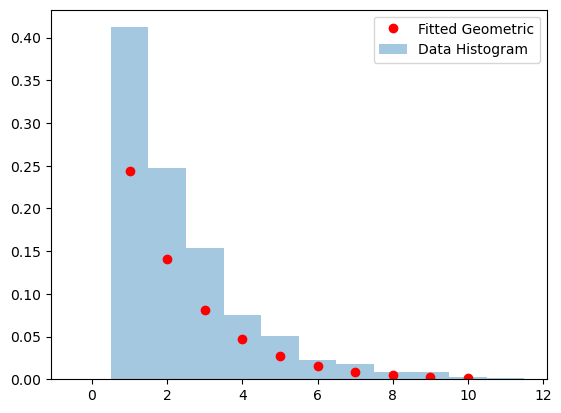

In [6]:
model.geometric_plot(fitted_mle_param)

In [7]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='geometric', par=(fitted_mle_param))
gof_test.gof(data)

Test Statistics: 2.038668296351197 ; Critical Value: 7.814727903251178
Accept H0 that the distribution is a good fit at the given significance level.


True

### 4) Poisson(7)

In [8]:
# generate data
data_dist = dgn.Datagen(dist_type='poisson', row_count=1000, par=(7), seed=1) 
data = data_dist.data_generation()

In [9]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='poisson')
fitted_mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_mle_param)

The fitted MLE parameter is 6.9680.


In [10]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 16


['Binomial', 'Geometric', 'Poisson']

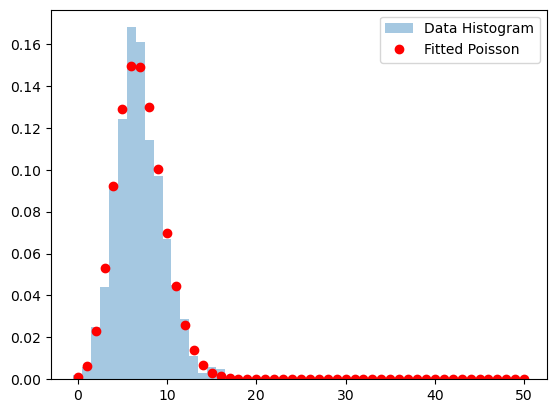

In [12]:
model.poisson_plot(fitted_mle_param)

In [14]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='poisson', par=(fitted_mle_param))
gof_test.gof(data)

Test Statistics: 7.2263444055178425 ; Critical Value: 7.814727903251178
Accept H0 that the distribution is a good fit at the given significance level.


True

In [15]:
# perform Goodness of Fit test for geometric
# first fit data to geometric
model = dft.Fitting(data, dist_type='geometric') 

gof_test = gof.Gof(dist_type='geometric', par=model.fit())
gof_test.gof(data)

Test Statistics: 787.1986856511212 ; Critical Value: 7.814727903251178
Reject H0, the distribution is NOT a good fit at this significance level.


False

In [17]:
# perform Goodness of Fit test for binomial
# first fit data to binomial
model = dft.Fitting(data, dist_type='binomial', n=16) 

gof_test = gof.Gof(dist_type='binomial', par=model.fit())
gof_test.gof(data)


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.


Test Statistics: 115.1095498333352 ; Critical Value: 5.991464547107983
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 5) Uniform(2.3, 4.1)

In [18]:
# generate data
data_dist = dgn.Datagen(dist_type='uniform', row_count=1000, par=(2.3,4.1), seed=1) 
data = data_dist.data_generation()

In [21]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='uniform')
a, b = model.fit()
print("The fitted MLE parameters are %(a).4f %(b).4f." %{'a':a, 'b':b})

The fitted MLE parameters are 2.3002 4.0952.


In [22]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']

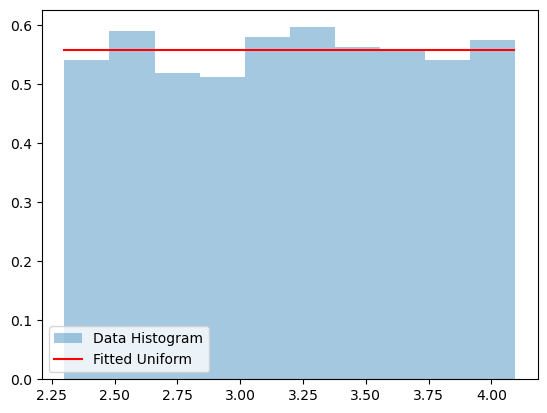

In [23]:
model.uniform_plot((a,b))

In [24]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='uniform', par=(a,b))
gof_test.gof(data)

Test Statistics: 1.7744754096977031 ; Critical Value: 7.814727903251178
Accept H0 that the distribution is a good fit at the given significance level.


True

### 6) Exponential(0.35)

In [34]:
# generate data
data_dist = dgn.Datagen(dist_type='exponential', row_count=2000, par=(0.35), seed=1) 
data = data_dist.data_generation()

In [35]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='exponential')
mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %mle_param)

The fitted MLE parameter is 0.3593.


In [36]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']

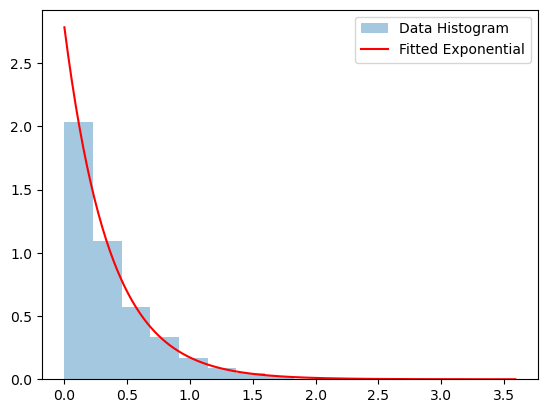

In [37]:
model.exponential_plot(mle_param)

In [38]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='exponential', par=mle_param)
gof_test.gof(data)

Test Statistics: 4.057442187982422 ; Critical Value: 7.814727903251178
Accept H0 that the distribution is a good fit at the given significance level.


True

### 7) Normal(3,2)

In [12]:
data = data_generation('normal', (3,2), row_count)

model = dft.Fitting(data)
a,b = model.normal_fit()
print(a, b)

2.9980220524801653 2.0135990113646702


In [13]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Normal']


['Uniform', 'Normal']

#### GoF
Performing Goodness of Fit for Normal & Uniform

In [33]:
# Perform GoF
from scipy.stats import goodness_of_fit as gof
import scipy.stats

In [34]:
gof(dist=scipy.stats.norm, data=data, known_params=None, fit_params={'loc':a, 'scale':b}, guessed_params=None)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=3.027238046501875, scale=2.004243494825721)
 success: True
 message: 'The fit was performed successfully.', statistic=0.6920102078584023, pvalue=0.0709, null_distribution=array([0.31331213, 0.35092277, 0.42675564, ..., 0.34044246, 0.42806255,
       0.19192935]))

In [38]:
a1,b1 = model.uniform_fit()
gof(dist=scipy.stats.uniform, data=data, known_params=None, fit_params={'loc':a1, 'scale':b1}, guessed_params=None)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=-4.35544317585887, scale=11.089562399168333)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.', statistic=inf, pvalue=1.0, null_distribution=array([inf, inf, inf, ..., inf, inf, inf]))

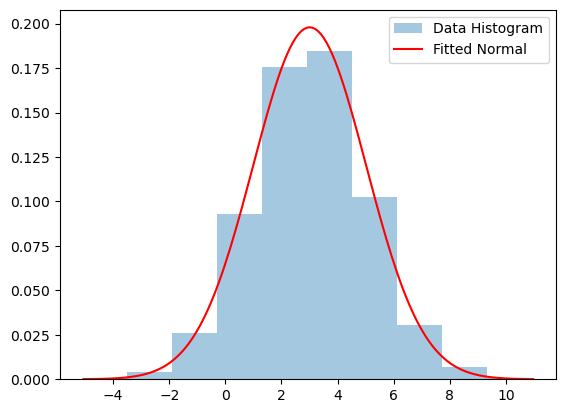

In [10]:
model.normal_plot(params=(a,b))

### 8) Weibull(2.1, 4.3)

In [14]:
data = data_generation('weibull', (2.1, 4.3), row_count)

model = dft.Fitting(data)
a,b = model.weibull_fit()
print(a, b)

2.0919867034118376 4.269614281841613


In [15]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

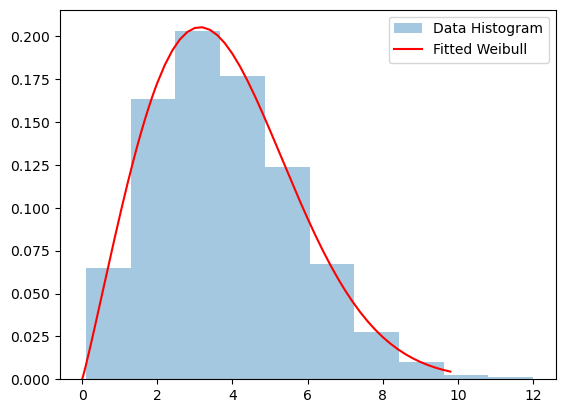

In [13]:
model.weibull_plot((a,b))

### 9) Gamma(3.1, 5.6)

In [16]:
data = data_generation('gamma', (3.1, 5.6), row_count)

model = dft.Fitting(data)
a,b = model.gamma_fit()
print(a, b)

3.1294751546778032 5.600464381113792


In [17]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

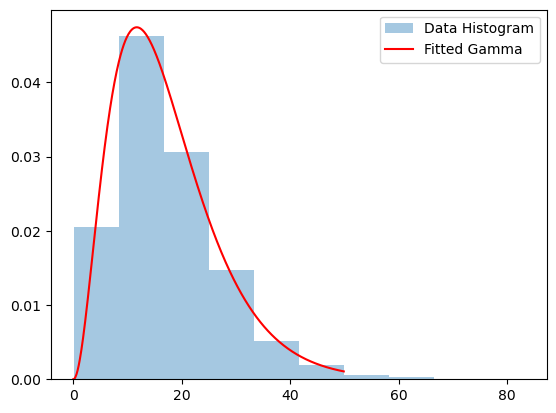

In [6]:
model.gamma_plot((a,b))

### Approximate Chi-squared GoF Test 